In [2]:
!pip install opendatasets
import opendatasets as od

# Download the dataset
od.download('https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals')

100%|██████████| 656M/656M [00:06<00:00, 107MB/s]


In [ ]:
import os
import shutil

def move_images_except_butterfly(src_dir, dest_dir):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Get a list of all folders in the source directory
    folders = os.listdir(src_dir)

    # Iterate through each folder
    for folder in folders:
        folder_path = os.path.join(src_dir, folder)

        # Check if the folder is not named "butterfly"
        if os.path.isdir(folder_path) and folder != "butterfly":
            # Iterate through files in the folder and move them to the destination directory
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                dest_path = os.path.join(dest_dir, filename)

                # Move the file
                shutil.move(file_path, dest_path)

    print("Images moved successfully!")

# Specify the source and destination directories
source_directory = "/content/animal-image-dataset-90-different-animals/animals/animals"
destination_directory = "/content/processed/0"

# Call the function to move images
move_images_except_butterfly(source_directory, destination_directory)


Images moved successfully!


In [ ]:
import os
import shutil

def move_images(source_directory, destination_directory):
    try:
        # Ensure the destination directory exists; create it if necessary
        if not os.path.exists(destination_directory):
            os.makedirs(destination_directory)

        # Iterate through files in the source directory and move them to the destination directory
        for filename in os.listdir(source_directory):
            source_path = os.path.join(source_directory, filename)
            destination_path = os.path.join(destination_directory, filename)

            # Move the file
            shutil.move(source_path, destination_path)

        print(f"All images from '{source_directory}' moved to '{destination_directory}' successfully.")
    except FileNotFoundError:
        print(f"Error: Source directory '{source_directory}' not found.")
    except Exception as e:
        print(f"Error: {e}")

# Example usage
source_directory = "/content/animal-image-dataset-90-different-animals/animals/animals/butterfly"
destination_directory = "/content/processed/1"

move_images(source_directory, destination_directory)


All images from '/content/animal-image-dataset-90-different-animals/animals/animals/butterfly' moved to '/content/processed/1' successfully.


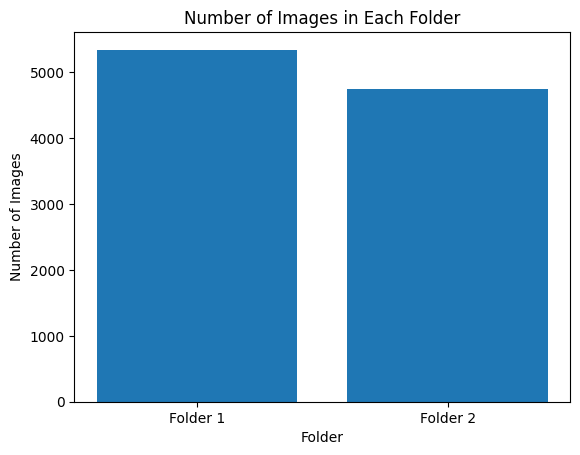

In [ ]:
# prompt: plot the number of images in both folders of /content/processed

import matplotlib.pyplot as plt
import os

# Get the number of images in each folder
folder1_path = "/content/processed/0"
folder2_path = "/content/processed/1"

num_images_folder1 = len(os.listdir(folder1_path))
num_images_folder2 = len(os.listdir(folder2_path))

# Create a bar chart
x = ["Folder 1", "Folder 2"]
y = [num_images_folder1, num_images_folder2]

plt.bar(x, y)
plt.title("Number of Images in Each Folder")
plt.xlabel("Folder")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
len(os.listdir(folder1_path))

5339

In [ ]:
!pip install Augmentor

In [ ]:
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

def augment_images(source_directory, output_directory, target_count=3000):
    # Create an ImageDataGenerator
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Ensure the destination directory exists; create it if necessary
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Get the list of files in the source directory
    image_files = [f for f in os.listdir(source_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Calculate the number of additional images needed
    existing_images = len(image_files)
    remaining_images = max(0, target_count - existing_images)

    # Augment images until the target count is reached
    for filename in tqdm(image_files, desc="Augmenting images"):
        img_path = os.path.join(source_directory, filename)
        img = image.load_img(img_path)
        img_array = image.img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_directory, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= remaining_images:
                break

    print(f"Augmentation complete. Total images in '{output_directory}': {len(os.listdir(output_directory))}")

# Specify source and output directories
source_directory = "/content/processed/1"
output_directory = "/content/processed/1"

# Create the augmented dataset
augment_images(source_directory, output_directory, target_count=5000)


Augmenting images:   0%|          | 0/4735 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import os

directory_path = '/content/processed'
class_folders = []

# Check if the directory exists
if os.path.exists(directory_path) and os.path.isdir(directory_path):
    # Get all folder names in the specified directory, excluding .ipynb_checkpoints
    folder_names = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder)) and folder != '.ipynb_checkpoints']

    # Print the folder names
    print("Folder names in '{}':".format(directory_path))
    for folder_name in folder_names:
        class_folders.append(folder_name)
        print(folder_name)
else:
    print("The specified directory does not exist.")


Folder names in '/content/processed':
0
1


In [ ]:
base_dir = '/content/processed'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

val_dir = os.path.join(base_dir, 'val')
os.makedirs(val_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [ ]:

import shutil

# List of class folder names
class_folders = class_folders
# Split ratios (adjust these as needed)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for folder in class_folders:
    source_folder = os.path.join(base_dir, folder)
    train_dest = os.path.join(train_dir, folder)
    val_dest = os.path.join(val_dir, folder)
    test_dest = os.path.join(test_dir, folder)

    os.makedirs(train_dest, exist_ok=True)
    os.makedirs(val_dest, exist_ok=True)
    os.makedirs(test_dest, exist_ok=True)

    filenames = os.listdir(source_folder)
    num_files = len(filenames)

    num_train = int(num_files * train_ratio)
    num_val = int(num_files * val_ratio)

    train_files = filenames[:num_train]
    val_files = filenames[num_train:num_train + num_val]
    test_files = filenames[num_train + num_val:]

    for file in train_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(train_dest, file)
        shutil.copy(src_path, dest_path)

    for file in val_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(val_dest, file)
        shutil.copy(src_path, dest_path)

    for file in test_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(test_dest, file)
        shutil.copy(src_path, dest_path)



In [ ]:

size = 128

batch_size = 64
target_size = (size,size)  # Adjust as needed

train_datagen = ImageDataGenerator(
     rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='binary',
    batch_size=batch_size)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False)

Found 8067 images belonging to 2 classes.
Found 1007 images belonging to 2 classes.
Found 1011 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size 3x3, and 'relu' activation function
model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation='linear'))

# Layer 2: Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 64 filters, kernel size 3x3, and 'relu' activation function
model.add(Conv2D(128, (3, 3), activation='linear'))

# Layer 4: Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))


# Layer 7: Flatten layer to transition from 2D to 1D
model.add(Flatten())

# Layer 8: Fully connected layer with 128 neurons and 'relu' activation function
model.add(Dense(128, activation='linear'))
model.add(Dense(128, activation='linear'))
model.add(Dense(128, activation='linear'))

# Output layer: Fully connected layer with 1 neuron (binary classification) and 'sigmoid' activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 115200)            0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
from tensorflow.keras import layers, regularizers, callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-15)
# prompt: add early stopping

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [ ]:
progess = model.fit(
    train_generator, epochs=30, validation_data=val_generator, callbacks=[lr_scheduler,early_stopping]
)

Epoch 1/30
127/127 [==============================] - 69s 515ms/step - loss: 0.7939 - accuracy: 0.9019 - val_loss: 0.0617 - val_accuracy: 0.9831 - lr: 0.0010
Epoch 2/30
127/127 [==============================] - 65s 515ms/step - loss: 0.0853 - accuracy: 0.9752 - val_loss: 0.0573 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 3/30
127/127 [==============================] - 65s 509ms/step - loss: 0.0772 - accuracy: 0.9778 - val_loss: 0.0967 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 4/30
127/127 [==============================] - 67s 530ms/step - loss: 0.0529 - accuracy: 0.9870 - val_loss: 0.0447 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 5/30
127/127 [==============================] - 66s 517ms/step - loss: 0.0472 - accuracy: 0.9887 - val_loss: 0.0981 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 6/30
127/127 [==============================] - 64s 506ms/step - loss: 0.0419 - accuracy: 0.9896 - val_loss: 0.0511 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 6: early stopping


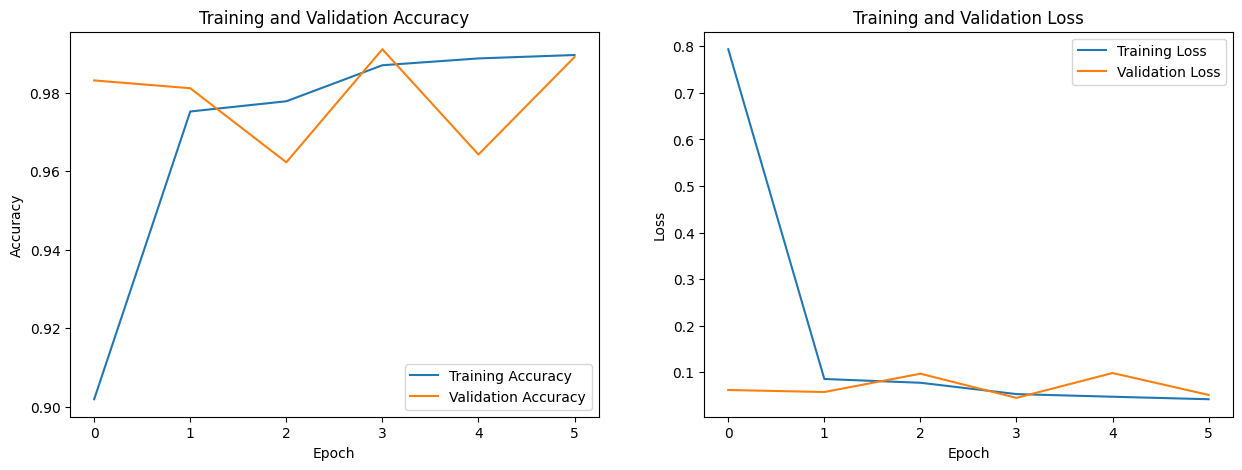

In [ ]:
# prompt: plot the training and validation graph

import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation accuracy on the first subplot
ax1.plot(progess.history['accuracy'], label="Training Accuracy")
ax1.plot(progess.history['val_accuracy'], label="Validation Accuracy")
ax1.set_title("Training and Validation Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Plot the training and validation loss on the second subplot
ax2.plot(progess.history['loss'], label="Training Loss")
ax2.plot(progess.history['val_loss'], label="Validation Loss")
ax2.set_title("Training and Validation Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()

# Show the plot
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16/16 [==============================] - 6s 342ms/step - loss: 0.0557 - accuracy: 0.9901
Test Loss: 0.0557
Test Accuracy: 0.9901


#one vs five

In [3]:
import os
import random
import shutil

# Set the path to the folder containing the subfolders
main_folder_path = '/content/animal-image-dataset-90-different-animals/animals/animals'

# Set the path to the directory where you want to store the selected subfolders
output_directory = '/content/onevfive'

# Get a list of all subfolders in the main folder
subfolders = [f.path for f in os.scandir(main_folder_path) if f.is_dir()]

# Select 5 random subfolders
selected_subfolders = random.sample(subfolders, 5)

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Move the selected subfolders to the output directory
for subfolder in selected_subfolders:
    subfolder_name = os.path.basename(subfolder)
    output_path = os.path.join(output_directory, subfolder_name)
    shutil.move(subfolder, output_path)

print("Selected subfolders have been moved to the output directory.")


Selected subfolders have been moved to the output directory.


In [4]:
base_dir = '/content/onevfive'

In [5]:
import os

directory_path = base_dir
class_folders = []

# Check if the directory exists
if os.path.exists(directory_path) and os.path.isdir(directory_path):
    # Get all folder names in the specified directory, excluding .ipynb_checkpoints
    folder_names = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder)) and folder != '.ipynb_checkpoints']

    # Print the folder names
    print("Folder names in '{}':".format(directory_path))
    for folder_name in folder_names:
        class_folders.append(folder_name)
        print(folder_name)
else:
    print("The specified directory does not exist.")


Folder names in '/content/onevfive':
hyena
cow
badger
dog
sparrow


In [6]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

val_dir = os.path.join(base_dir, 'val')
os.makedirs(val_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [7]:

import shutil

# List of class folder names
class_folders = class_folders
# Split ratios (adjust these as needed)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for folder in class_folders:
    source_folder = os.path.join(base_dir, folder)
    train_dest = os.path.join(train_dir, folder)
    val_dest = os.path.join(val_dir, folder)
    test_dest = os.path.join(test_dir, folder)

    os.makedirs(train_dest, exist_ok=True)
    os.makedirs(val_dest, exist_ok=True)
    os.makedirs(test_dest, exist_ok=True)

    filenames = os.listdir(source_folder)
    num_files = len(filenames)

    num_train = int(num_files * train_ratio)
    num_val = int(num_files * val_ratio)

    train_files = filenames[:num_train]
    val_files = filenames[num_train:num_train + num_val]
    test_files = filenames[num_train + num_val:]

    for file in train_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(train_dest, file)
        shutil.copy(src_path, dest_path)

    for file in val_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(val_dest, file)
        shutil.copy(src_path, dest_path)

    for file in test_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(test_dest, file)
        shutil.copy(src_path, dest_path)



In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

size = 128

batch_size = 64
target_size = (size,size)  # Adjust as needed

train_datagen = ImageDataGenerator(
     rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False)

Found 240 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Attention, GlobalAveragePooling2D

# Create a Sequential model
model = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size 3x3, and 'relu' activation function
model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation='relu'))

# Layer 2: Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 64 filters, kernel size 3x3, and 'relu' activation function
model.add(Conv2D(32, (3, 3), activation='relu'))

# Layer 4: Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Attention layer

# Layer 5: Convolutional layer with 16 filters, kernel size 3x3, and 'relu' activation function
model.add(Conv2D(16, (3, 3), activation='relu'))

# Layer 6: Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Fire module
model.add(Conv2D(32, (1, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Layer 7: Flatten layer to transition from 2D to 1D
model.add(Flatten())

# Layer 8: Fully connected layer with 128 neurons and 'relu' activation function
model.add(Dense(128, activation='relu'))

# Output layer: Fully connected layer with 5 neurons (assuming you have 5 classes) and 'softmax' activation function
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 16)       

In [14]:
from tensorflow.keras import layers, regularizers, callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-15)
# prompt: add early stopping

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [15]:
progess = model.fit(
    train_generator, epochs=50, validation_data=val_generator, callbacks=[lr_scheduler]
)

Epoch 1/50
4/4 [==============================] - 5s 498ms/step - loss: 1.6143 - accuracy: 0.1958 - val_loss: 1.6067 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 2s 619ms/step - loss: 1.6008 - accuracy: 0.2000 - val_loss: 1.5896 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 3/50
4/4 [==============================] - 3s 993ms/step - loss: 1.5583 - accuracy: 0.2458 - val_loss: 1.5880 - val_accuracy: 0.2333 - lr: 0.0010
Epoch 4/50
4/4 [==============================] - 2s 663ms/step - loss: 1.5976 - accuracy: 0.3375 - val_loss: 1.6420 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 5/50
4/4 [==============================] - 3s 665ms/step - loss: 1.6163 - accuracy: 0.2292 - val_loss: 1.6254 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 6/50
4/4 [==============================] - 3s 647ms/step - loss: 1.5932 - accuracy: 0.2125 - val_loss: 1.6159 - val_accuracy: 0.1333 - lr: 0.0010
Epoch 7/50
4/4 [==============================] - 3s 706ms/step - loss: 1.5668 - a

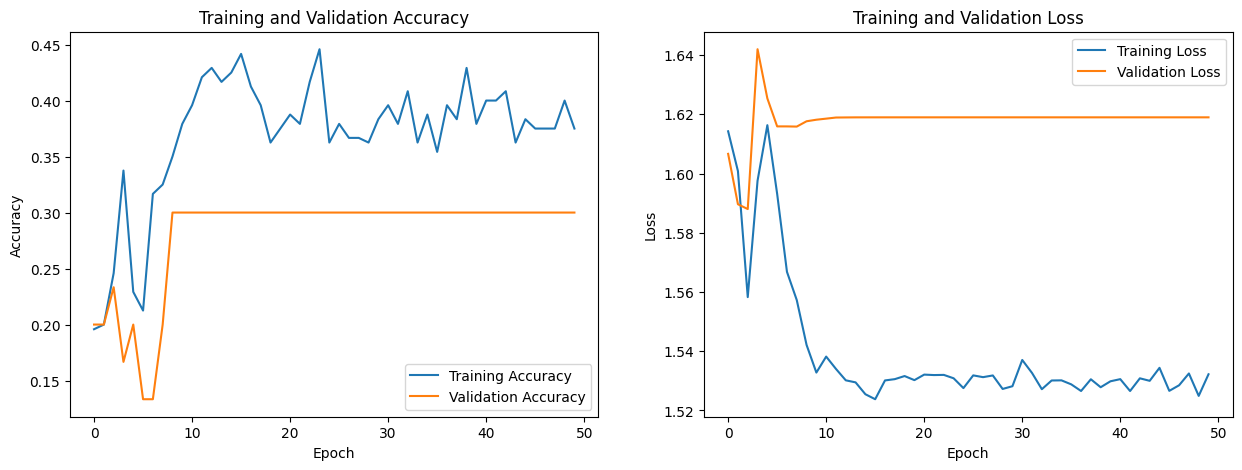

In [16]:
# prompt: plot the training and validation graph

import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation accuracy on the first subplot
ax1.plot(progess.history['accuracy'], label="Training Accuracy")
ax1.plot(progess.history['val_accuracy'], label="Validation Accuracy")
ax1.set_title("Training and Validation Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Plot the training and validation loss on the second subplot
ax2.plot(progess.history['loss'], label="Training Loss")
ax2.plot(progess.history['val_loss'], label="Validation Loss")
ax2.set_title("Training and Validation Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()

# Show the plot
plt.show()
